## Classification tutorial
### Predicting if a person would buy life insurance based on his age

In [17]:
# imort libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
# import and explore the dataset
df = pd.read_csv("insurance_data.csv")
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Generally it seems like people with older age are more probabilistic to buy the life insurance as compared to young people.

Text(0, 0.5, 'Insurance Bought')

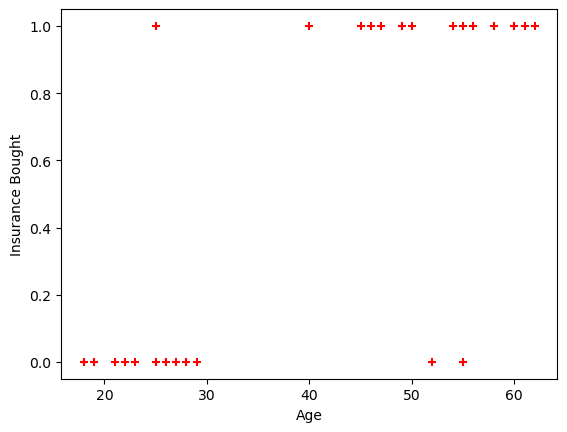

In [ ]:
# Scatter plot of the dataset to visually understand the data

plt.scatter(df["age"], df["bought_insurance"], marker="+", color="red")
plt.xlabel("Age")
plt.ylabel("Insurance Bought")

From the above scatter plot, it is quite clear that more older people are buying life insurance than younger people, except few outliers in both the groups.

In [21]:
# Next we will create a test set and train set from the original dataset
x_train, x_test, y_train, y_test = train_test_split(df[["age"]], df["bought_insurance"], train_size=0.8)

# print("x_train\n", x_train)
print("x_test\n", x_test)
# print("y_train\n", y_train)
print("y_test\n", y_test)


x_test
     age
5    56
9    61
13   29
24   50
18   19
16   25
y_test
 5     1
9     1
13    0
24    1
18    0
16    1
Name: bought_insurance, dtype: int64


In [24]:
# Now we train our model using Logistic Regression
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [27]:
# after training the data, its time to predict
print("Test X Data")
print(x_test)

y_predicted = model.predict(x_test)

print("Y Predicted")
print(y_predicted)


Test X Data
    age
5    56
9    61
13   29
24   50
18   19
16   25
Y Predicted
[1 1 0 1 0 0]


In [28]:
model.predict_proba(x_test)

array([[0.09921931, 0.90078069],
       [0.04838326, 0.95161674],
       [0.87747129, 0.12252871],
       [0.21785098, 0.78214902],
       [0.97110756, 0.02889244],
       [0.93003078, 0.06996922]])

In [29]:
model.score(x_test, y_test)

0.8333333333333334

In [30]:
# value of coefficient 
model.coef_

array([[0.15461585]])

In [33]:
# value of intercept
model.intercept_

array([-6.45255852])

In [40]:
# Validating math from Sigmoid Function

import math

def sigmoid(z):
    return 1 /(1+math.exp(-z))

def predict_insurance(age):
    # z = wx + b
    b = model.intercept_[0]
    w = model.coef_[0]
    z = w * age + b
    
    y_hat = sigmoid(z)
    
    print("probability: ", y_hat)
    
    if y_hat > 0.5:
        print(f"Person with given age {age} will buy the insurance ✅")
    else:
        print(f"Person with given age {age} will not buy the insurance ❌")

In [42]:
# lets predict using above functions

age = 12
predict_insurance(age)

probability:  0.00997974055487442
Person with given age 12 will not buy the insurance ❌


/var/folders/20/0ywsyqdn0jg7qr3g1qycbmqh0000gn/T/ipykernel_18965/175662068.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 /(1+math.exp(-z))


In [43]:
age = 48
predict_insurance(age)

probability:  0.7249205938754003
Person with given age 48 will buy the insurance ✅


/var/folders/20/0ywsyqdn0jg7qr3g1qycbmqh0000gn/T/ipykernel_18965/175662068.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 /(1+math.exp(-z))
